<a href="https://colab.research.google.com/github/rafaaeluz/curry/blob/main/Projeto_PRF_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise exploratória de dados de acidentes de trânsito da PRF**


Os dados públicos foram retirados do site da PRF https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf



Esta análise tem como objetivo compreender a evolução dos acidentes de trânsito no primeiro semestre de 2023. Minha meta neste projeto, é buscar por insights a partir da manipulação dados disponíveis, compreendendo assim a sazonalidade dos acidentes de trânsito e obtendo por consequência, informações valiosas para tomada de decisão em políticas públicas e campanhas de prevenção de acidentes nas rodovias.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
data = pd.read_csv('/content/Dados_PRF_2023.csv', sep=';', encoding='latin-1', on_bad_lines='skip')

In [5]:
data.head(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,Não,1,0,0,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,1,0,0,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,Não,3,0,0,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


1.1 COLUNAS

In [6]:
#VERIFICANDO O NOME DAS COLUNAS
data.columns.tolist()


['id',
 'data_inversa',
 'dia_semana',
 'horario',
 'uf',
 'br',
 'km',
 'municipio',
 'causa_acidente',
 'tipo_acidente',
 'classificacao_acidente',
 'fase_dia',
 'sentido_via',
 'condicao_metereologica',
 'tipo_pista',
 'tracado_via',
 'uso_solo',
 'pessoas',
 'mortos',
 'feridos_leves',
 'feridos_graves',
 'ilesos',
 'ignorados',
 'feridos',
 'veiculos',
 'latitude',
 'longitude',
 'regional',
 'delegacia',
 'uop']

1.2 DIMENSÃO DOS DADOS

In [7]:
#QUANTIDADE DE LINHAS E COLUNAS

print(f'Linhas: {data.shape[0]}')
print(f'Colunas: {data.shape[1]}')

Linhas: 32440
Colunas: 30


1.3 TIPOS DE DADOS

In [8]:
#VERIFICANDO OS TIPOS DE DADOS

data.dtypes

id                          int64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                   object
longitude                  object
regional                   object
delegacia                  object
uop           

Algumas colunas estão em formato diferente das quais deveriam estar. Será feita uma análise mais aprofundada posteriormente e a possível troca do tipo de dados da coluna.

OBS:
*   **data_inversa**: está como object. Será transformada para datetime
*   **horário**: está como object. Será transormado para datetime
*   **br**: está como float. Será transformado para inteiro
*   **km**: está como object. Será transformado para float
*   **latitude**: está como object. Será transformado para float
*   **longitude**: está como object. Será transformada para float






     

1.4 DADOS NULOS

In [9]:
#VERIFICANDO DADOS NULOS
#a soma dos valores indica a quantidade de dados nulos na respectiva coluna

data.isna().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                         78
km                         78
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    3
delegacia                 302
uop                        18
dtype: int64

OBS: Existem colunas com dados nulos. Será necessário fazer o tratamento desses dados. As colunas abaixo precisarão ser analisadas:

1.5 METADADOS

In [10]:
def generate_metadata(dataframe):

#gera um dataframe contendo metadados das colunas do dataframe fornecido

#parametros do dataframe: dataframe para o qual os parametros serão gerados

#return: dataframe contendo metadados

#coleta de metadados básicos

    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'quantidade_nulos': dataframe.isnull().sum(),
        'percentual_nulos': round((dataframe.isnull().sum()/len(dataframe)) * 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [11]:
#testando a função com o dataframe
metadata = generate_metadata(data)

metadata

,nome_variavel,tipo,quantidade_nulos,percentual_nulos,cardinalidade
0,id,int64,0,0.00,32440
1,veiculos,int64,0,0.00,12
2,feridos,int64,0,0.00,28
3,ignorados,int64,0,0.00,10
4,ilesos,int64,0,0.00,43
5,feridos_graves,int64,0,0.00,14
6,feridos_leves,int64,0,0.00,24
7,mortos,int64,0,0.00,8
8,pessoas,int64,0,0.00,48
9,br,float64,78,0.24,114


1.6 MANIPULAÇÃO DE DADOS



In [12]:
# TRATANDO OS DADOS NULOS

data_com_nulos = data[data.columns[data.isnull().any()]]

data_com_nulos.head()

,br,km,regional,delegacia,uop
0,101.0,114,SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,116.0,"113,1",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,163.0,1112,SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,376.0,"314,8",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,116.0,"569,4",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [13]:
# VERIFICANDO A PORCENTAGEM DE NULOS

for column in data_com_nulos.columns:
    print(f'A coluna {column} possui {((data_com_nulos[column].isna().sum() / data_com_nulos.shape[0]) * 100).round(2)}% de dados nulos')

A coluna br possui 0.24% de dados nulos
A coluna km possui 0.24% de dados nulos
A coluna regional possui 0.01% de dados nulos
A coluna delegacia possui 0.93% de dados nulos
A coluna uop possui 0.06% de dados nulos


Por enquanto irei somente retirar as linhas com dados nulos, e posteriormente, farei um tratamento mais adequeado

In [14]:
# FILTRANDO OS DADOS SEM OS DADOS NULOS

data = data[~data.br.isna()]
data = data[~data.km.isna()]
data = data[~data.regional.isna()]
data = data[~data.delegacia.isna()]
data = data[~data.uop.isna()]

data.head()


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,Não,1,0,0,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,1,0,0,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,Não,3,0,0,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [15]:
# VERIFICANDO A PORCENTAGEM DE NULOS

for column in data_com_nulos.columns:
    print(f'A coluna {column} possui {((data[column].isna().sum() / data.shape[0]) * 100).round(2)}% de dados nulos')


A coluna br possui 0.0% de dados nulos
A coluna km possui 0.0% de dados nulos
A coluna regional possui 0.0% de dados nulos
A coluna delegacia possui 0.0% de dados nulos
A coluna uop possui 0.0% de dados nulos


In [16]:
# TRATANDO OS TIPOS DE DADOS

# trocando o tipo da coluna data_inversa
data['data_inversa'] = pd.to_datetime(data['data_inversa'])

data.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,Não,1,0,0,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,1,0,0,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,Não,3,0,0,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [17]:
# trocando o tipo da coluna br

data.br = data.br.astype(int)

data.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,Não,1,0,0,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,1,0,0,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,Não,3,0,0,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [18]:
# trocando vírgula para ponto

data.km = data.km.apply(lambda x: str(x).replace(',', '.'))

data.km = pd.to_numeric(data.km)

data.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101,114.0,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116,113.1,TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112.0,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,Não,1,0,0,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376,314.8,ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,1,0,0,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116,569.4,MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,Não,3,0,0,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [19]:
# trocando vírgula para ponto

data.latitude = data.latitude.apply(lambda x: str(x).replace(',','.'))

# transformando a coluna longitude em float

data.latitude = pd.to_numeric(data.latitude)

data.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101,114.0,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,-19.094849,"-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116,113.1,TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,1,-23.044566,"-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112.0,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,Não,1,0,0,1,0,0,1,1,-9.700206,"-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376,314.8,ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,1,0,0,0,1,0,0,1,-23.985512,"-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116,569.4,MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,Não,3,0,0,2,1,0,2,2,-20.100075,"-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [20]:
# trocando vírgula para ponto

data.longitude = data.longitude.apply(lambda x: str(x).replace(',','.'))

# transformando a coluna longitude em float

data.longitude = pd.to_numeric(data.longitude)

data.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101,114.0,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,-19.094849,-40.050958,SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116,113.1,TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,1,-23.044566,-45.582598,SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112.0,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,Não,1,0,0,1,0,0,1,1,-9.700206,-54.875888,SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376,314.8,ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,1,0,0,0,1,0,0,1,-23.985512,-51.083555,SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116,569.4,MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,Não,3,0,0,2,1,0,2,2,-20.100075,-42.178841,SPRF-MG,DEL06-MG,UOP03-DEL06-MG


Como a base de dados não possui mais dados nulos e as colunas estão no formato ideal, avançamos para as próximas etapas.

1.7 ESTATÍSTICA DESCRITIVA

In [21]:
# SEPARANDO AS COLUNAS EM NUMÉRICAS E CATEGÓRICAS

# numéricas
numerical_columns = data.select_dtypes(include=['int64','float64']).columns

# categóricas
categorical_columns = data.select_dtypes(include=['object']).columns


In [22]:
# analisando os dados numéricos

data[numerical_columns].describe()

,id,br,km,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000,32073.000000
mean,515149.330745,209.239329,261.130515,2.455024,0.082032,0.874754,0.277617,1.064478,0.156144,1.152371,1.664827,-19.222448,-46.432621
std,10528.896655,129.568944,224.907175,2.170485,0.325937,1.079929,0.617774,1.761562,0.442082,1.190487,0.721228,7.563605,5.994475
min,496506.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-33.588291,-66.282836
25%,506124.000000,101.000000,79.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-25.378500,-50.257911
50%,515286.000000,153.000000,199.400000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-20.784924,-47.449028
75%,524284.000000,324.000000,408.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-13.582588,-42.450893
max,536330.000000,495.000000,1237.000000,65.000000,7.000000,61.000000,29.000000,58.000000,14.000000,62.000000,12.000000,-1.063931,-34.828400


De acordo com os dados, pode-se observar a a ausência de dados discrepantes, estando todos dentro do esperado, portanto não há OUTLIERS.

In [23]:
# analisando os dados categóricos

data[categorical_columns].describe()

,dia_semana,horario,uf,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,regional,delegacia,uop
count,32073,32073,32073,32073,32073,32073,32073,32073,32073,32073,32073,32073,32073,32073,32073,32073
unique,7,1304,23,1669,71,16,3,4,2,9,3,10,2,23,146,381
top,domingo,18:00:00,MG,BRASILIA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,SPRF-MG,DEL01-PR,UOP01-DEL01-SP
freq,5315,466,4229,458,4638,6127,24593,17530,17405,19923,15733,17804,18712,4225,1170,541


Observando a tabela acima, é possível inferir alguns pontos, dentre eles:

*   O dia da semana que masi acontece acidentes é no **domingo**;
*   O estado em que mais ocorre acidentes é **MG**;
*   A causa principal dos acidentes é por **reação tardia ou ineficiência do condutor**;
*   O município em que mais ocorrem acidentes é **Brasilia**.







#2. FEATURE ENGINEERING

In [24]:
# criando uma cópia do Data Frame

data_01 = data.copy()

data_01.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101,114.0,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,-19.094849,-40.050958,SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116,113.1,TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,1,-23.044566,-45.582598,SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112.0,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,Não,1,0,0,1,0,0,1,1,-9.700206,-54.875888,SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376,314.8,ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,1,0,0,0,1,0,0,1,-23.985512,-51.083555,SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116,569.4,MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,Não,3,0,0,2,1,0,2,2,-20.100075,-42.178841,SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [25]:
# criando a coluna ano_mes

data_01['data_inversa_ano_mes'] = data_01.data_inversa.dt.strftime('%Y-%m')


#3. EXPLORAÇÃO DE DADOS

In [26]:
data_02 = data_01.copy()

data_02.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,data_inversa_ano_mes
0,496519,2023-01-01,domingo,02:00:00,ES,101,114.0,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1,0,1,0,0,0,1,1,-19.094849,-40.050958,SPRF-ES,DEL04-ES,UOP01-DEL04-ES,2023-01
1,496543,2023-01-01,domingo,03:40:00,SP,116,113.1,TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,5,1,0,0,0,4,0,1,-23.044566,-45.582598,SPRF-SP,DEL02-SP,UOP02-DEL02-SP,2023-01
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112.0,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,Não,1,0,0,1,0,0,1,1,-9.700206,-54.875888,SPRF-MT,DEL06-MT,UOP03-DEL06-MT,2023-01
3,496610,2023-01-01,domingo,10:40:00,PR,376,314.8,ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,Não,1,0,0,0,1,0,0,1,-23.985512,-51.083555,SPRF-PR,DEL07-PR,UOP02-DEL07-PR,2023-01
4,496659,2023-01-01,domingo,14:55:00,MG,116,569.4,MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,Não,3,0,0,2,1,0,2,2,-20.100075,-42.178841,SPRF-MG,DEL06-MG,UOP03-DEL06-MG,2023-01


3.1 ANÁLISE UNIVARIADA

In [27]:
def plot_box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe
    fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', wich='major', labelsize=12)

    # Remove gráficos vazios se houver
    for j in range(i+1, nrows*3):
       fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

    plot_box_plot(data_02)

**VARIABILIDADE E DISTRIBUIÇÃO**

Variáveis como pessoas, mortos, feridos_leves, feridos_graves, ilesos, ignorados e feridos têm a maioria de seus valores concentrados perto de zero, indicando que muitos incidentes envolvem poucas pessoas ou nenhuma vítima. No entanto, existem alguns valores atipicamente altos para estas variáveis, sugerindo que, embora raros, existem incidentes comum número significativo de envolvidos ou vítimas.

**OUTLIERS**

Muitas das variáveis apresentam outliers. Estes são pontos que caem fora das antenas do boxplot e podem indicar valores atipicamente altos ou baixos. Por exemplo, a variável pessoas tem vários valores que são consideravelmente mais altos do que a mediana, sugerindo incidentes com um número anormalmento alto de pessoas envolvidas. Os outliers podem indicar tanto erros de entrada de dados quanto eventos reais que são atípicos. Eles podem ser investigados mais a fundo para entender sua natureza.

**CONCENTRAÇÃO DE DADOS**

A linha central do box (mediana) para variáveis como mortos, feridos_leves, feridos_graves e ilesos está no valor zero. Isso indica que a maioria dos incidentes não resulta em mortes oou ferimentos.

**AMPLITUDE DOS DADOS**

O intervalo interquartil (IQR), que é a altura da caixa no boxplot, indica onde reside a metade central dos dados. Para muitas variáveis. Para muitas das variáveis, o IQR é pequeno, mostrando que os valores estão concentrados. Por outro lado, uma caixa maior indica maior variabilidade dos dados.

**TENDÊNCIAS E ANOMALIAS**

Se os dados estivessem distribuídos em grupos ou categorias(como diferentes estados ou tipos de incidentes), poderíamos usar boxplots para comparar essas categorias e identificar tendências ou anomalias específicas de cada grupo. Estes são insights gerais que podem ser obtidos a partir dos boxplots. Para insights mais específicos ou detalhados, seria útil combinar a análise visual dos boxplots com outras técnicas estatísticas e métodos de visualização.

In [28]:
def plot_histograms(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis
    numéricas do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=False)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios se houver
    for j in range(i+1, nrows*3):
      fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - histograma com KDE", fontsize=20, fontweight='bold', y=1.05)



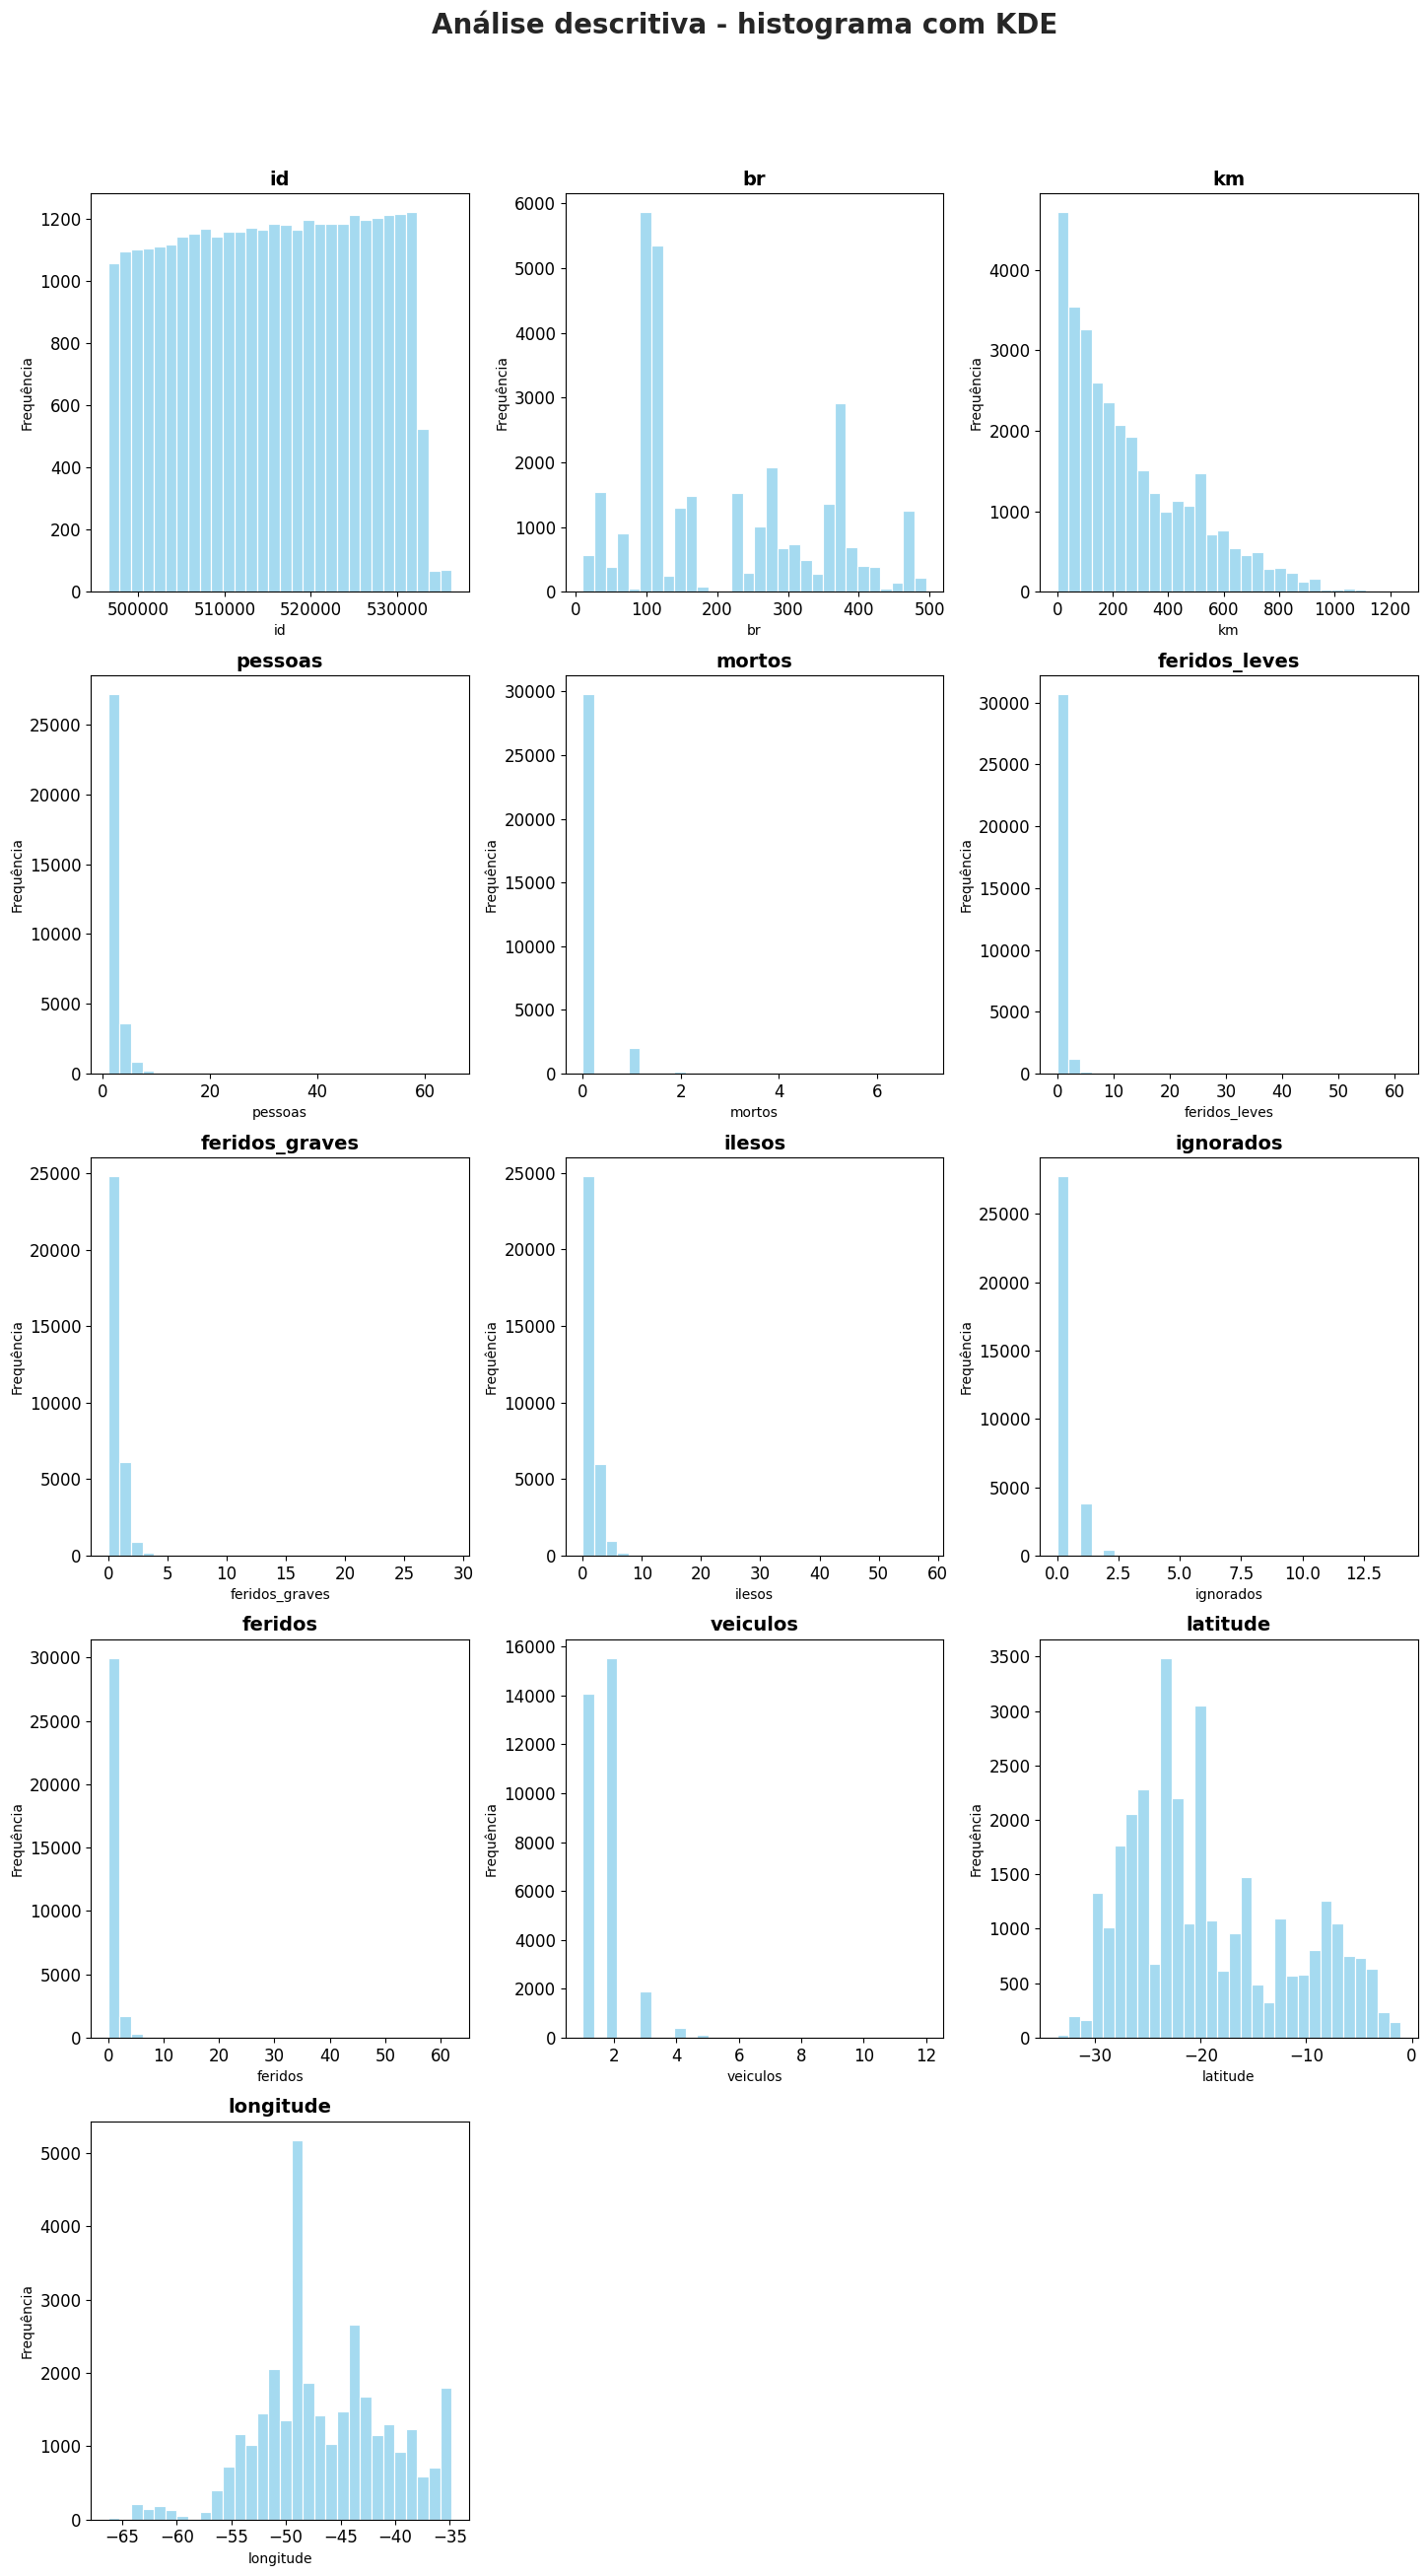

In [29]:
plot_histograms(data_02)

3.2 QUAL A QUANTIDADE DE ACIDENTES POR MÊS?

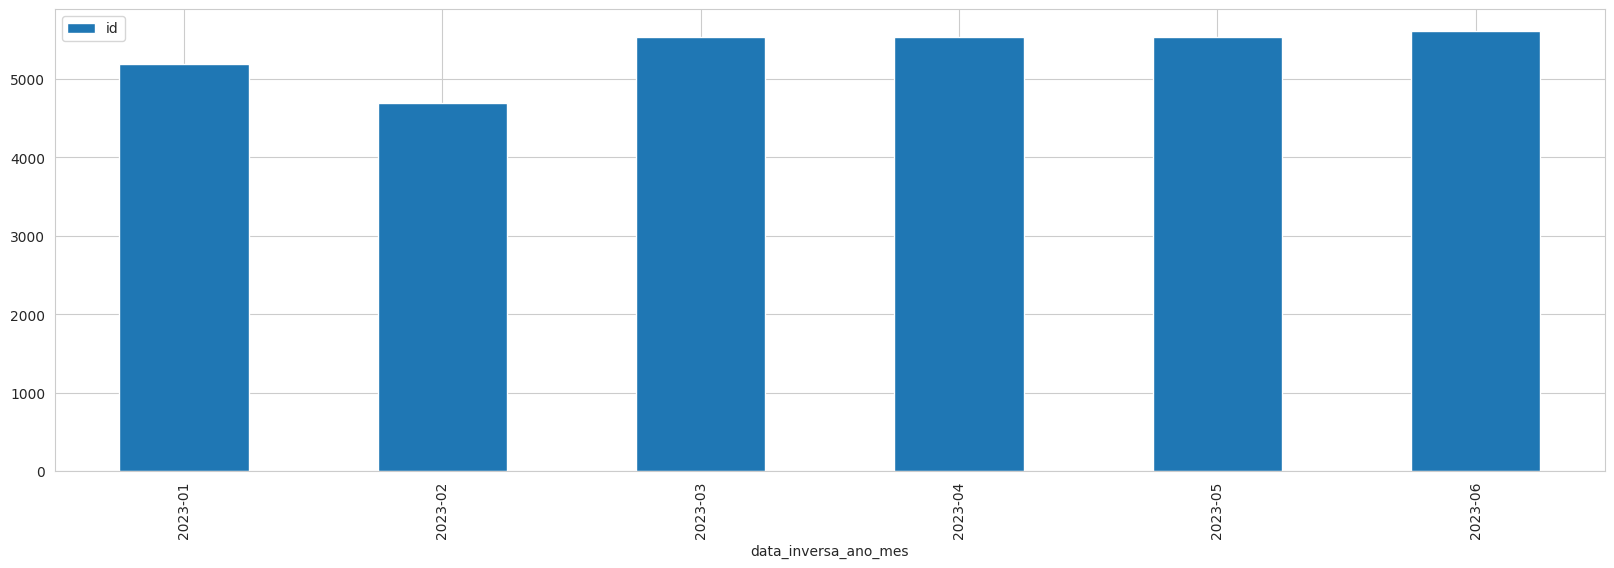

In [30]:
data_02.groupby('data_inversa_ano_mes')[['id']].count().plot(kind='bar', figsize=(20,6));

3.3 QUAIS OS DIAS DA SEMANA OCORREM MAIS ACIDENTES ?

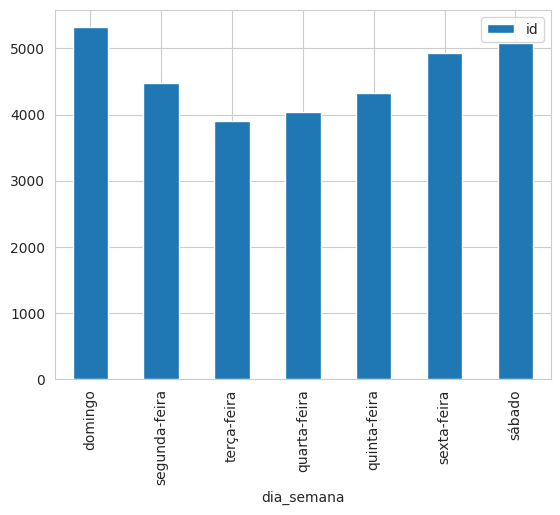

In [31]:
data_02.groupby('dia_semana')[['id']].count().reindex(['domingo', 'segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado']).plot(kind='bar');

O dia da semana em que mais ocorrem acidentes é no domingo, conforme obervado nas análises.

3.4 QUAL HORÁRIO COM MAIOR NÚMERO DE ACIDENTES ?



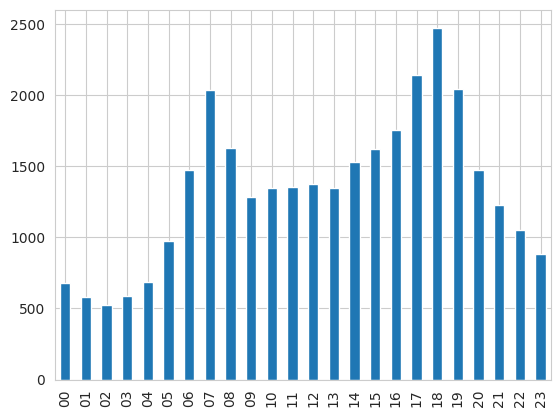

In [32]:
data_02.horario.apply(lambda x: x.split(':')[0]).value_counts().sort_index().plot(kind='bar');

Conforme observado na análise, o horário das 18:00h é o que mais ocorre acidentes.

3.5 QUAL O ESTADO COM O MAIOR NÚMERO DE ACIDENTES ?

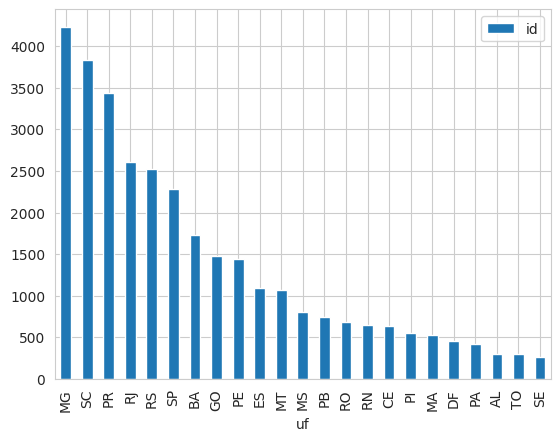

In [33]:
data_02.groupby('uf')[['id']].count().sort_values('id', ascending=False).plot(kind='bar');

Pode-se concluir com a análise realizada que predomina o número de acidentes no estado de Minas Gerais.

3.6 QUAL O MUNICÍPIO COMO A MAIOR OCORRÊNCIA DE ACIDENTES ?


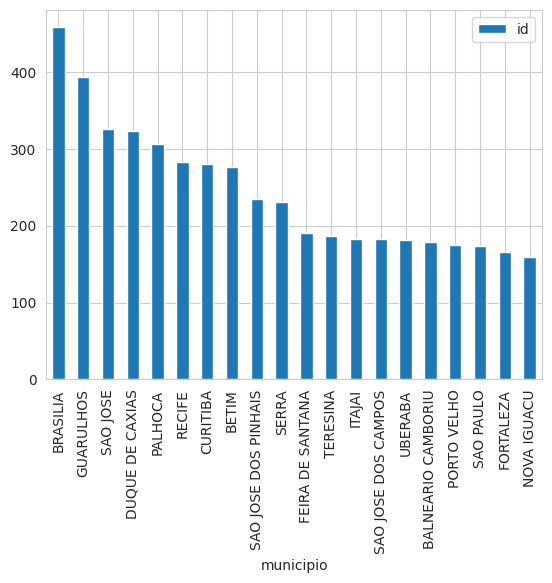

In [34]:
data_02.groupby('municipio')[['id']].count().sort_values('id', ascending=False).head(20).plot(kind='bar');

O Município onde ocorre o maio número de acidentes de acordo com a análise estatística é Brasília-MG.

3.7 QUAL O TOTAL DE OCORRÊNCIAS REGISTRADAS ?

In [35]:

colunas = ['id', 'causa_acidente']
colunas_groupby = ['causa_acidente']
data_plot = data.loc[:, colunas].groupby(colunas_groupby).count()#.reset_index()

data_plot.loc[:,'id'].sum()


32073

O total de ocorrências regitradas no período são 32073.

3.8 QUAL LOCAL REGISTROU O MAIOR NÚMERO DE MORTOS ?

In [36]:
colunas = ['municipio', 'mortos']

colunas_groupby = ['municipio']

data.loc[:, colunas].groupby(colunas_groupby).sum().reset_index().sort_values(by='mortos', ascending=False)


,municipio,mortos
215,BRASILIA,29
590,GOVERNADOR VALADARES,17
485,DUQUE DE CAXIAS,16
1639,VIANA,15
1413,SAO JOSE,15
...,...,...
475,DOIS RIACHOS,0
474,DOIS IRMAOS DO BURITI,0
472,DIVINO,0
1134,PICADA CAFE,0


O maior quantidade de vítimas fatais foi registrada no município de Brasilia-MG.

3.9 QUAL MUNICÍPIO REGISTROU O MAIOR NÚMERO DE FERIDOS LEVES ?

In [37]:
colunas = ['municipio', 'uf', 'feridos_leves',]

colunas_groupby = ['municipio']

data.loc[:,colunas].max()


municipio        ZE DOCA
uf                    TO
feridos_leves         61
dtype: object

O município de Zé Doca no Tocantins registrou o maior número de feridos leves.

4.0 QUANTOS ACIDENTES FORAM REGISTRADOS DE ACORDO COM CADA CAUSA ?

In [38]:
colunas = ['id', 'causa_acidente']
colunas_groupby = ['causa_acidente']
data_plot = data.groupby(colunas_groupby)['id'].count().reset_index()

data_plot



,causa_acidente,id
0,Acessar a via sem observar a presença dos outr...,2985
1,Acesso irregular,366
2,Acostamento em desnível,66
3,Acumulo de areia ou detritos sobre o pavimento,122
4,Acumulo de água sobre o pavimento,295
...,...,...
66,Transitar na contramão,1107
67,Transitar no Acostamento,15
68,Ultrapassagem Indevida,756
69,Velocidade Incompatível,2108


4.1 QUAL FOI O NÚMERO DE MORTOS AGRUPADOS POR CAUSA DE ACIDENTE?

In [39]:
colunas = ['causa_acidente', 'mortos']

colunas_groupby = ['causa_acidente']

num_mortos = data.loc[:, colunas].groupby(colunas_groupby).sum().reset_index()
num_mortos



,causa_acidente,mortos
0,Acessar a via sem observar a presença dos outr...,169
1,Acesso irregular,19
2,Acostamento em desnível,4
3,Acumulo de areia ou detritos sobre o pavimento,2
4,Acumulo de água sobre o pavimento,8
...,...,...
66,Transitar na contramão,422
67,Transitar no Acostamento,5
68,Ultrapassagem Indevida,168
69,Velocidade Incompatível,225


4.2 QUAL A PRINCIPAL CONDIÇÃO METEOROLÓGICA PARA CADA CAUSA DE ACIDENTE ?

In [40]:
colunas = ['causa_acidente', 'condicao_metereologica']

colunas_groupby = ['causa_acidente']

data_plot = data.loc[:,colunas].groupby(colunas_groupby)['condicao_metereologica'].max()

data_plot

#A INTENÇAO É AGRUPAR POR CAUSA DE ACIDENTE MAS MOSTRAR AS CONDIÇOES METEOROLOGICAS

causa_acidente
Acessar a via sem observar a presença dos outros veículos                       Vento
Acesso irregular                                                                  Sol
Acostamento em desnível                                                           Sol
Acumulo de areia ou detritos sobre o pavimento                                    Sol
Acumulo de água sobre o pavimento                                                 Sol
                                                                                ...  
Transitar na contramão                                                            Sol
Transitar no Acostamento                                                          Sol
Ultrapassagem Indevida                                                            Sol
Velocidade Incompatível                                                         Vento
Área urbana sem a presença de local apropriado para a travessia de pedestres    Vento
Name: condicao_metereologica, Length: 7

In [41]:
colunas = ['feridos_leves']

data.loc[:,colunas].sum()

#número total de feridos leves

feridos_leves    28056
dtype: int64

In [42]:
colunas = ['causa_acidente', 'horario']

colunas_groupby = ['horario']

data_plot = data.loc[:,colunas].groupby(colunas_groupby).count()

data_plot

,causa_acidente
horario,
00:00:00,38
00:01:00,17
00:02:00,3
00:03:00,5
00:04:00,2
...,...
23:54:00,2
23:55:00,22
23:57:00,1


In [43]:
colunas = ['causa_acidente', 'horario']

# Crie um novo DataFrame com as colunas de interesse
data_selecionado = data[colunas]

# Agrupe por 'causa_acidente' e 'horario' e conte a ocorrência de cada combinação
data_grouped = data_selecionado.groupby(['causa_acidente', 'horario']).size().reset_index(name='count')

# Encontre os horários com o maior número de acidentes para cada causa
horarios_mais_acidentes = data_grouped.loc[data_grouped.groupby('causa_acidente')['count'].idxmax()]

# Exiba os horários com mais acidentes para cada causa
print(horarios_mais_acidentes)







                                         causa_acidente   horario  count
363   Acessar a via sem observar a presença dos outr...  18:00:00     51
658                                    Acesso irregular  18:00:00      9
738                             Acostamento em desnível  11:30:00      3
776      Acumulo de areia ou detritos sobre o pavimento  06:50:00      3
951                   Acumulo de água sobre o pavimento  14:30:00      6
...                                                 ...       ...    ...
8498                             Transitar na contramão  19:00:00     19
8580                           Transitar no Acostamento  00:25:00      1
8825                             Ultrapassagem Indevida  19:30:00     13
9129                            Velocidade Incompatível  15:00:00     30
9319  Área urbana sem a presença de local apropriado...  17:40:00      3

[71 rows x 3 columns]


ANALISE GEOGRÁFICA COM MAPAS



<ipython-input-44-aa3ef467b1ee>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

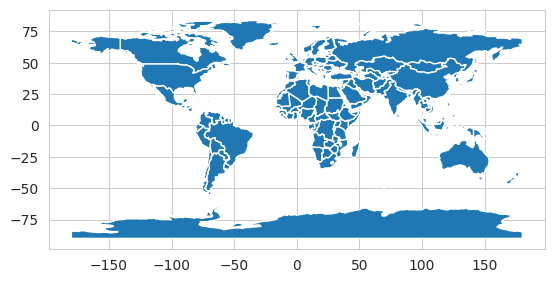

In [44]:
import geopandas as gpd

#carregar o conjunto de dados naturalearth_lowres
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot()

MOSTRANDO SOMENTE O MAPA DO BRASIL


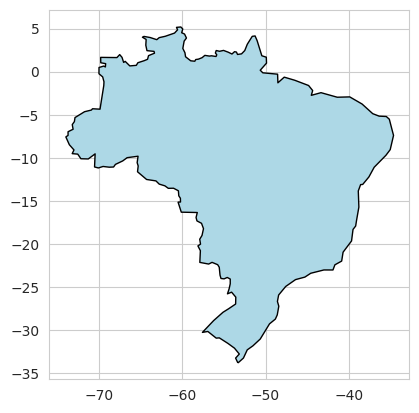

In [45]:
brasil = world[world['name'] == 'Brazil']
brasil.plot(color = 'lightblue', edgecolor = 'black');

<ipython-input-46-501acd1bb917>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


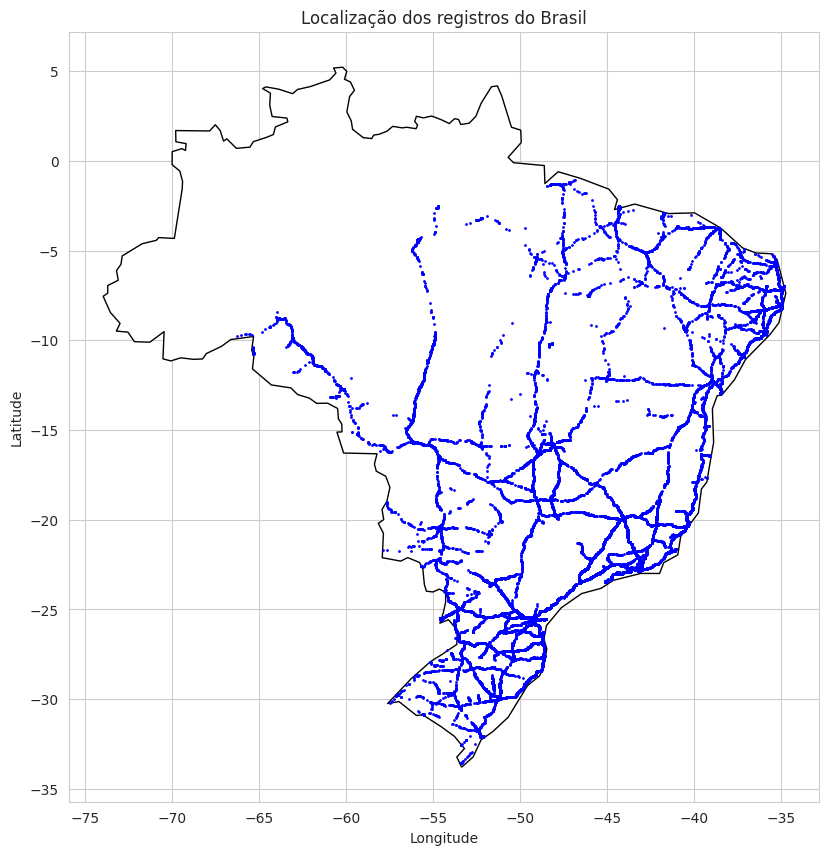

In [46]:
import matplotlib.pyplot as plt

# carrega o mapa do Brasil
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brasil = world[world.name == 'Brazil']
data = data_01
data_map = data.dropna(subset=['latitude', 'longitude'])

# convertendo latitude e longitude para a forma correta
#data_map['latitude'] = data_map['latitude'].str.replace(',','.'),astype(float)
#data_map['longitude'] = data_map['longitude'].str.replace(',','.'),astype(float)

# plotando

fig, ax = plt.subplots(figsize=(10,10))
brasil.plot(ax=ax, color='white', edgecolor='black')
ax.scatter(data_map['longitude'], data_map['latitude'], color='blue', s=1)
plt.title('Localização dos registros do Brasil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

CRIANDO PONTOS DE ACIDENTES NO BRASIL


In [47]:
import folium

# amostras de um subconjunto de dados para garantir o desempenho
sample_data = data_map.sample(min(1000, len(data_map)))

# mapa do Brasil
mBrasil = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)

#adiciona marcadores nos registros de dados da amostra
for idx, row in sample_data.iterrows():
  folium.Marker(
      location=[row['latitude'], row['longitude']],
      popup=row['causa_acidente'],
      icon=folium.Icon(icon='circle', color='blue', prefix='fa')
  ).add_to(mBrasil)

mBrasil


Neste mapa podemos verificar os registros e suas respectivas causas e perceber que a maior concentração de acidentes está na região sudeste.


Agora filtramos os acidentes fatais e verificamos a distribuição no mapa:

In [48]:
# mapa do brasil
m_marcadores_sep = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)

# marcadores para registros e marcadores para acidentes com vítimas fatais
for idx, row in sample_data.iterrows():
  if 'Com Vítimas Fatais' in row['classificacao_acidente']:
    icon_color = 'red'
    icon_type = 'times'
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['causa_acidente'],
        icon=folium.Icon(icon=icon_type, color=icon_color, prefix='fa')
    ).add_to(m_marcadores_sep)
  else:
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m_marcadores_sep)

m_marcadores_sep

In [49]:
# Defina os períodos do dia
def obter_periodo(horario):
    if horario >= 05:00:00 and horario < 18:00:00:
        return 'dia'
    else:
        return 'noite'

# Aplicar a função para obter o período para cada hora
data['periodo'] = data['horario'].apply(obter_periodo)

# Contar ocorrências de acidentes em cada período
contagem_por_periodo = data['periodo'].value_counts()

# Exibir a contagem de acidentes por período
print(contagem_por_periodo)

SyntaxError: ignored